In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import multivariate_normal

# 假设已经有了 DailyPrices.csv 文件
prices = pd.read_csv("DailyPrices.csv")

# 排除非数值列，假设日期列名为 'Date'
prices_numeric = prices.select_dtypes(include=[np.number])

# 计算收益率
returns = prices_numeric.pct_change().dropna()
spy = returns['SPY']
tsla = returns['TSLA']

In [2]:
# OLS 回归
X = sm.add_constant(spy)
model = sm.OLS(tsla, X).fit()
B = model.params
e = tsla - X.dot(B)

# 计算协方差
covar = np.cov(X.iloc[:, 1], e, rowvar=False)
means = [np.mean(spy), np.mean(e)]

# 模拟
nsim = 100000
d = multivariate_normal(mean=means, cov=covar)
sim = d.rvs(size=nsim)

x_sim = np.column_stack((np.ones(nsim), sim[:, 0]))
y_sim = x_sim.dot(B) + sim[:, 1]

# 分布比较
print(f"Mean TSLA vs Simulated  {np.mean(tsla)} vs {np.mean(y_sim)}")
print(f"StDev TSLA vs Simulated  {np.std(tsla)} vs {np.std(y_sim)}")

Mean TSLA vs Simulated  0.00025546548993468903 vs 0.0003609486605876527
StDev TSLA vs Simulated  0.03794139882614548 vs 0.0378766656484348


In [8]:
aapl = returns['AAPL']

def OLS(X, Y):
    n = len(X)
    _X = sm.add_constant(X)
    model = sm.OLS(Y, _X).fit()
    B = model.params
    e = model.resid
    return B, e

# 对两支股票进行OLS回归
B_tsla, e_tsla = OLS(spy, tsla)
B_tsla

const   -0.000516
SPY      1.722471
dtype: float64

In [10]:
corr = np.corrcoef(spy, tsla)
corr

array([[1.        , 0.51057991],
       [0.51057991, 1.        ]])

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import multivariate_normal

# 读取数据和计算收益率
# prices = pd.read_csv("DailyPrices.csv")
# returns = prices.pct_change().dropna()
# spy = returns['SPY']
# tsla = returns['TSLA']
aapl = returns['AAPL']

def OLS(X, Y):
    n = len(X)
    _X = sm.add_constant(X)
    model = sm.OLS(Y, _X).fit()
    B = model.params
    e = model.resid
    return B, e

# 对两支股票进行OLS回归
B_tsla, e_tsla = OLS(spy, tsla)
B_aapl, e_aapl = OLS(spy, aapl)

# 计算相关性和协方差
corr = np.corrcoef(np.column_stack((spy, e_tsla, e_aapl)).T)
covar = np.cov(np.column_stack((spy, e_tsla, e_aapl)).T)
means = np.array([spy.mean(), 0, 0])

# 进行模拟
nsim = 10000
d = multivariate_normal(mean=means, cov=covar)
sim = d.rvs(size=nsim)

x_sim = np.column_stack((np.ones(nsim), sim[:, 0]))
tsla_sim = x_sim.dot(B_tsla) + sim[:, 1]
aapl_sim = x_sim.dot(B_aapl) + sim[:, 2]

# 比较分布
print(f"Mean TSLA vs Simulated - {tsla.mean()} vs {tsla_sim.mean()}")
print(f"StDev TSLA vs Simulated - {tsla.std()} vs {tsla_sim.std()}")
print("")
print(f"Mean AAPL vs Simulated - {aapl.mean()} vs {aapl_sim.mean()}")
print(f"StDev AAPL vs Simulated - {aapl.std()} vs {aapl_sim.std()}")


Mean TSLA vs Simulated - 0.00025546548993468903 vs 0.000978037114647446
StDev TSLA vs Simulated - 0.03801318961659727 vs 0.03809857334848138

Mean AAPL vs Simulated - 0.0005659591923965353 vs 0.0010847887275065003
StDev AAPL vs Simulated - 0.018048488229681792 vs 0.01796045558410739


In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import skew, kurtosis, multivariate_normal

# # Load and preprocess data
# prices = pd.read_csv("DailyPrices.csv")
# returns = prices.pct_change().dropna()
spy = returns['SPY']
tsla = returns['TSLA']
aapl = returns['AAPL']
gm = returns['C']

def OLS(X, Y):
    n = len(X)
    _X = sm.add_constant(X)
    model = sm.OLS(Y, _X).fit()
    B = model.params
    e = model.resid
    return B, e

# OLS regression with different independent variables
B_tsla, e_tsla = OLS(gm, tsla)
B_aapl, e_aapl = OLS(spy, aapl)

# Calculate correlation
corr_matrix = np.corrcoef(np.column_stack((gm, spy, e_tsla, e_aapl)).T)

# Simulation (assuming you already have the simulation results)

# Compare distributions
print(f"Mean TSLA vs Simulated -- {tsla.mean()} vs {tsla_sim.mean()}")
print(f"StDev TSLA vs Simulated -- {tsla.std()} vs {tsla_sim.std()}")
print(f"Skewness TSLA vs Simulated -- {skew(tsla)} vs {skew(tsla_sim)}")
print(f"Kurtosis TSLA vs Simulated -- {kurtosis(tsla)} vs {kurtosis(tsla_sim)}")
print("")
print(f"Mean AAPL vs Simulated - {aapl.mean()} vs {aapl_sim.mean()}")
print(f"StDev AAPL vs Simulated - {aapl.std()} vs {aapl_sim.std()}")
print(f"Skewness AAPL vs Simulated -- {skew(aapl)} vs {skew(aapl_sim)}")
print(f"Kurtosis AAPL vs Simulated -- {kurtosis(aapl)} vs {kurtosis(aapl_sim)}")
print("")
print(f"Skewness and Kurtosis of e_tesla -- {skew(e_tsla)} and {kurtosis(e_tsla)}")
print(f"Skewness and Kurtosis of e_aapl -- {skew(e_aapl)} and {kurtosis(e_aapl)}")

# 模拟的结果更接近正态分布

Mean TSLA vs Simulated -- 0.00025546548993468903 vs 0.000978037114647446
StDev TSLA vs Simulated -- 0.03801318961659727 vs 0.03809857334848138
Skewness TSLA vs Simulated -- -0.07524964256295014 vs 0.0009837981908619685
Kurtosis TSLA vs Simulated -- 0.6712933737689135 vs -0.08189422217107012

Mean AAPL vs Simulated - 0.0005659591923965353 vs 0.0010847887275065003
StDev AAPL vs Simulated - 0.018048488229681792 vs 0.01796045558410739
Skewness AAPL vs Simulated -- 0.41396450628527115 vs -0.005864082956031645
Kurtosis AAPL vs Simulated -- 3.1728523110423987 vs -0.0952713260082989

Skewness and Kurtosis of e_tesla -- -0.20036866986993476 and 1.373494327831609
Skewness and Kurtosis of e_aapl -- -0.20616008319175816 and 3.1211068428802955


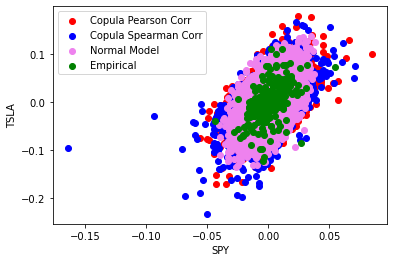

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import t, norm
from scipy.optimize import minimize
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# # Assuming the 'returns' DataFrame is already defined with 'SPY', 'TSLA', and 'AAPL' columns
# spy = returns['SPY']
# tsla = returns['TSLA']
# aapl = returns['AAPL']

def general_t_ll(params, x):
    mu, s, nu = params
    td = t(df=nu, loc=mu, scale=s)
    return -np.sum(np.log(td.pdf(x)))

def fit_general_t(x):
    # Initial estimates based on moments
    start_m = np.mean(x)
    start_nu = 6.0 / kurtosis(x) + 4
    start_s = np.sqrt(np.var(x) * (start_nu - 2) / start_nu)
    initial_params = [start_m, start_s, start_nu]

    # Minimize negative log-likelihood
    result = minimize(general_t_ll, initial_params, args=(x,), method='L-BFGS-B', bounds=[(None, None), (1e-6, None), (2.0001, None)])
    m, s, nu = result.x
    return m, s, nu, t(df=nu, loc=m, scale=s)

m_spy, s_spy, nu_spy, d_spy = fit_general_t(spy)
m_tsla, s_tsla, nu_tsla, d_tsla = fit_general_t(tsla)
m_aapl, s_aapl, nu_aapl, d_aapl = fit_general_t(aapl)

# Create the U matrix
U = np.column_stack((d_spy.cdf(spy), d_tsla.cdf(tsla), d_aapl.cdf(aapl)))

# Transform U into Z
Z = norm.ppf(U)

# Pearson and Spearman correlations
R = np.corrcoef(Z.T)
# R_emperical = np.corrcoef(returns[['SPY', 'TSLA', 'AAPL']].T)  
R_spearman = np.array([[spearmanr(Z[:, i], Z[:, j])[0] for j in range(Z.shape[1])] for i in range(Z.shape[1])])

# Simulate using the Copula
NSim = 10000
copula_pearson = multivariate_normal(mean=[0, 0, 0], cov=R)
pearson_samples = copula_pearson.rvs(size=NSim)
copula_spearman = multivariate_normal(mean=[0, 0, 0], cov=R_spearman)
spearman_samples = copula_spearman.rvs(size=NSim)

# Transform back to original scale
pearson_samples[:, 0] = d_spy.ppf(norm.cdf(pearson_samples[:, 0]))
pearson_samples[:, 1] = d_tsla.ppf(norm.cdf(pearson_samples[:, 1]))
pearson_samples[:, 2] = d_aapl.ppf(norm.cdf(pearson_samples[:, 2]))

spearman_samples[:, 0] = d_spy.ppf(norm.cdf(spearman_samples[:, 0]))
spearman_samples[:, 1] = d_tsla.ppf(norm.cdf(spearman_samples[:, 1]))
spearman_samples[:, 2] = d_aapl.ppf(norm.cdf(spearman_samples[:, 2]))

# Normal model simulation
normal_cov = np.cov(returns[['SPY', 'TSLA']].T)
mvn = multivariate_normal(mean=[spy.mean(), tsla.mean()], cov=normal_cov)
normal_samples = mvn.rvs(size=NSim)

# Compare plots
plt.scatter(pearson_samples[:, 0], pearson_samples[:, 1], color='red', label='Copula Pearson Corr')
plt.scatter(spearman_samples[:, 0], spearman_samples[:, 1], color='blue', label='Copula Spearman Corr')
plt.scatter(normal_samples[:, 0], normal_samples[:, 1], color='violet', label='Normal Model')
plt.scatter(spy, tsla, color='green', label='Empirical')
plt.xlabel('SPY')
plt.ylabel('TSLA')
plt.legend()
plt.show()


In [ ]:
U

array([[0.86464287, 0.89871664, 0.86205417],
       [0.53386369, 0.51269531, 0.47697878],
       [0.07701185, 0.11386042, 0.16132173],
       [0.33088808, 0.30030979, 0.33079555],
       [0.23365378, 0.16321477, 0.20267231],
       [0.11659575, 0.04986961, 0.11647862],
       [0.84858884, 0.87541649, 0.78728696],
       [0.93112644, 0.61018703, 0.7339592 ],
       [0.43307654, 0.96147426, 0.53478223],
       [0.15208539, 0.43624583, 0.29291163],
       [0.89425588, 0.66924484, 0.83521126],
       [0.36884534, 0.13702882, 0.46568419],
       [0.29113525, 0.49129401, 0.19506823],
       [0.02706884, 0.17001582, 0.13602912],
       [0.30395475, 0.72491919, 0.29213419],
       [0.96235086, 0.84329208, 0.94450159],
       [0.38088993, 0.28421507, 0.10559972],
       [0.19484178, 0.11255121, 0.13419112],
       [0.31050744, 0.19357997, 0.11062448],
       [0.93050823, 0.86691396, 0.91509036],
       [0.93204507, 0.87415401, 0.91063139],
       [0.80553621, 0.81579934, 0.62453877],
       [0.

In [ ]:
Z

array([[ 1.1014192 ,  1.27427289,  1.08959483],
       [ 0.08498588,  0.03182779, -0.05773771],
       [-1.42546197, -1.20625068, -0.98904022],
       [-0.43746223, -0.52350974, -0.43771749],
       [-0.72686679, -0.98133101, -0.83211398],
       [-1.19217789, -1.64611915, -1.19277567],
       [ 1.0303999 ,  1.15237499,  0.79704297],
       [ 1.48423299,  0.27980653,  0.6248316 ],
       [-0.16854687,  1.76805635,  0.08729687],
       [-1.02753038, -0.16049437, -0.54489859],
       [ 1.24948362,  0.43782891,  0.9749653 ],
       [-0.33491305, -1.09376597, -0.08612332],
       [-0.55007126, -0.02182441, -0.85936992],
       [-1.92573332, -0.95410275, -1.098335  ],
       [-0.51305978,  0.59751795, -0.54716062],
       [ 1.77864314,  1.00808046,  1.5937287 ],
       [-0.30314434, -0.57036503, -1.25027409],
       [-0.86019136, -1.21307169, -1.10679576],
       [-0.4944125 , -0.8647793 , -1.22321379],
       [ 1.47958686,  1.11192109,  1.37278473],
       [ 1.49119671,  1.14624936,  1.344